<a href="https://colab.research.google.com/github/aravindchakravarti/Deep_Learning_EVA_4/blob/master/S10_Cifar_Resnet/S10_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Up Google Drive and Libraries

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# to autoreload all the custom files when modified
import autoreload
%load_ext autoreload
%autoreload 2

In [0]:
# All the supporting python files are saved in GDrive
import sys
sys.path.append('./gdrive/My Drive/EVA_Library/')

In [5]:
# Print library info. Not completely written yet
from TestLibraryVersion import PrintLibraryInfo
PrintLibraryInfo()

The current version of the Library is 1.1


In [6]:
from pyTorchChitra.cifarImageLoader.DatasetLoader import getCifar10Data, cifar10WithAlbumentations
from pyTorchChitra.cnnModels.CNNModel import displayModelSummary, plainArch, ResNet18
from pyTorchChitra.modelTraining.modelTraining import setupOptimizer, runTheModel, modelTrainTestHistory
from pyTorchChitra.utils.utils import isCudaAvailable
from pyTorchChitra.modelTraining.lrFinder import LRFinder
from pyTorchChitra.gradCAM.visual import GradCAMView, plot_gradcam
from pyTorchChitra.utils.misClassfiedImages import misClassfied, displayMisClassfiedImages
from pyTorchChitra.cifarImageLoader.displayImages import displayDataSetSampleImages
!pip install torchsummary
#!pip install -U git+https://github.com/albu/albumentations


  pip install torch-lr-finder -v --global-option="amp"


# Set the Arguments for project and Setup Train/Test Dataset 

In [0]:
# Arguments for the functions
class Args:
  # ---- Data Loader Arguments -----
  train_batch_size = 512
  test_batch_size = 512
  num_workers = 4
  dataset_mean = [0.4914, 0.4822, 0.4465]
  dataset_std = [0.2023, 0.1994, 0.2010]
  classes = ['plane', 'car', 'bird', 'cat',
             'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class modelExtraSettings:
  '''Additional setting which are useful when debugging model '''
  RunLRFinder = False
  display_summary = False
  

In [8]:
# Get the Cifar-10 dataset and apply Ablumentation image augmentation techniques
train_loader, test_loader = cifar10WithAlbumentations(
                            batch_size = Args.train_batch_size, 
                            number_of_workers = Args.num_workers,
                            prob_transform = Args.num_workers  
                            )

Now downloading and allocating dataset
Cuda Available? cuda


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Now allocating Dataloaders


In [9]:
# Display the sample images. Images will be saved in current directory
displayDataSetSampleImages(train_loader, Args.classes,
                           Args.dataset_mean, Args.dataset_std, 
                           num_of_images = 20)

torch.Size([512, 32, 32, 3])


<Figure size 720x720 with 0 Axes>

# Train the Model

In [10]:
device = isCudaAvailable()
print (device)

cuda


In [0]:
model = ResNet18().to(device)

In [0]:
if modelExtraSettings.display_summary == True:
  displayModelSummary(model)

In [17]:
import torch.nn as nn
from torch.optim import SGD, Adam

if modelExtraSettings.RunLRFinder == True:
  criterion = nn.NLLLoss()
  optimizer = SGD(model.parameters(), lr=0.00001)
  lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
  lr_finder.range_test(train_loader, end_lr=10, num_iter=1000, step_mode="exp")


./gdrive/My Drive/EVA_Library/pyTorchChitra/cnnModels/CNNModel.py:183: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)



Learning rate search finished. See the graph with {finder_name}.plot()


0.042072662838444394


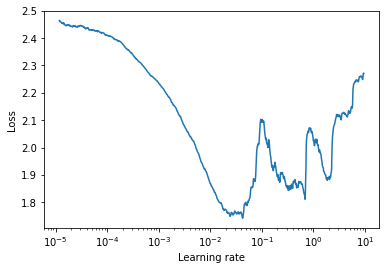

In [18]:
if modelExtraSettings.RunLRFinder == True:
  lr = lr_finder.history['lr'][lr_finder.history['loss'].index(lr_finder.best_loss)]
  print (lr)
  lr_finder.plot()

In [0]:
optimizer, scheduler = setupOptimizer(model, device, optimzer_select='NLLLoss', lr = 0.025)

In [14]:
train_losses, train_acc, test_losses, test_acc = runTheModel(model=model, 
                                                            device=device, 
                                                            optimizer=optimizer, 
                                                            train_loader=train_loader, 
                                                            test_loader=test_loader, 
                                                            scheduler=scheduler,
                                                            epochs = 50)


  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


./gdrive/My Drive/EVA_Library/pyTorchChitra/cnnModels/CNNModel.py:183: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 1.4978, Accuracy: 4462/10000 (44.62%)
Validation loss to Schedular = 1.4978484283447266

EPOCH: 1


Loss=1.5172852277755737 Batch_id=97 Accuracy=50.03: 100%|██████████| 98/98 [03:18<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 1.3491, Accuracy: 5169/10000 (51.69%)
Validation loss to Schedular = 1.349062530517578

EPOCH: 2


Loss=1.1481139659881592 Batch_id=97 Accuracy=55.01: 100%|██████████| 98/98 [03:18<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 1.1022, Accuracy: 6153/10000 (61.53%)
Validation loss to Schedular = 1.102168963623047

EPOCH: 3


Loss=0.9915217161178589 Batch_id=97 Accuracy=60.28: 100%|██████████| 98/98 [03:18<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 1.5494, Accuracy: 5377/10000 (53.77%)
Validation loss to Schedular = 1.54938310546875

EPOCH: 4


Loss=1.0214875936508179 Batch_id=97 Accuracy=63.81: 100%|██████████| 98/98 [03:18<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.9948, Accuracy: 6470/10000 (64.70%)
Validation loss to Schedular = 0.9947629150390624

EPOCH: 5


Loss=0.9167295098304749 Batch_id=97 Accuracy=66.80: 100%|██████████| 98/98 [03:18<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 1.0111, Accuracy: 6603/10000 (66.03%)
Validation loss to Schedular = 1.0110575256347656

EPOCH: 6


Loss=0.9913771748542786 Batch_id=97 Accuracy=69.17: 100%|██████████| 98/98 [03:17<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.8814, Accuracy: 6959/10000 (69.59%)
Validation loss to Schedular = 0.8813588500976562

EPOCH: 7


Loss=0.8467782139778137 Batch_id=97 Accuracy=70.64: 100%|██████████| 98/98 [03:18<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.8057, Accuracy: 7285/10000 (72.85%)
Validation loss to Schedular = 0.805692463684082

EPOCH: 8


Loss=0.7512467503547668 Batch_id=97 Accuracy=72.52: 100%|██████████| 98/98 [03:18<00:00,  2.03s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.7742, Accuracy: 7406/10000 (74.06%)
Validation loss to Schedular = 0.7741639099121094

EPOCH: 9


Loss=0.7021628618240356 Batch_id=97 Accuracy=73.89: 100%|██████████| 98/98 [03:18<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.9492, Accuracy: 6978/10000 (69.78%)
Validation loss to Schedular = 0.9491678039550782

EPOCH: 10


Loss=0.6990156173706055 Batch_id=97 Accuracy=74.99: 100%|██████████| 98/98 [03:18<00:00,  2.03s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.7660, Accuracy: 7453/10000 (74.53%)
Validation loss to Schedular = 0.7660023971557617

EPOCH: 11


Loss=0.7108772993087769 Batch_id=97 Accuracy=75.91: 100%|██████████| 98/98 [03:18<00:00,  2.03s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.6270, Accuracy: 7800/10000 (78.00%)
Validation loss to Schedular = 0.6269518020629883

EPOCH: 12


Loss=0.6887887716293335 Batch_id=97 Accuracy=77.12: 100%|██████████| 98/98 [03:19<00:00,  2.03s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.7143, Accuracy: 7540/10000 (75.40%)
Validation loss to Schedular = 0.714327066040039

EPOCH: 13


Loss=0.5903170704841614 Batch_id=97 Accuracy=77.84: 100%|██████████| 98/98 [03:18<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.6022, Accuracy: 7989/10000 (79.89%)
Validation loss to Schedular = 0.6021731826782226

EPOCH: 14


Loss=0.6458214521408081 Batch_id=97 Accuracy=78.49: 100%|██████████| 98/98 [03:16<00:00,  2.00s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.5796, Accuracy: 8061/10000 (80.61%)
Validation loss to Schedular = 0.5796411026000976

EPOCH: 15


Loss=0.5602984428405762 Batch_id=97 Accuracy=79.73: 100%|██████████| 98/98 [03:16<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.6150, Accuracy: 7934/10000 (79.34%)
Validation loss to Schedular = 0.6149756759643554

EPOCH: 16


Loss=0.6076706051826477 Batch_id=97 Accuracy=79.92: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.6180, Accuracy: 7902/10000 (79.02%)
Validation loss to Schedular = 0.6180493026733398

EPOCH: 17


Loss=0.5175957679748535 Batch_id=97 Accuracy=80.33: 100%|██████████| 98/98 [03:17<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.6016, Accuracy: 8033/10000 (80.33%)
Validation loss to Schedular = 0.6015604598999024

Epoch    18: reducing learning rate of group 0 to 2.5000e-03.
EPOCH: 18


Loss=0.5267932415008545 Batch_id=97 Accuracy=83.61: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4209, Accuracy: 8562/10000 (85.62%)
Validation loss to Schedular = 0.4208757911682129

EPOCH: 19


Loss=0.5496676564216614 Batch_id=97 Accuracy=84.91: 100%|██████████| 98/98 [03:17<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4106, Accuracy: 8628/10000 (86.28%)
Validation loss to Schedular = 0.4106146514892578

EPOCH: 20


Loss=0.4086828827857971 Batch_id=97 Accuracy=85.43: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4034, Accuracy: 8641/10000 (86.41%)
Validation loss to Schedular = 0.4034076385498047

EPOCH: 21


Loss=0.3810136020183563 Batch_id=97 Accuracy=85.43: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3982, Accuracy: 8634/10000 (86.34%)
Validation loss to Schedular = 0.3982471481323242

EPOCH: 22


Loss=0.3451615869998932 Batch_id=97 Accuracy=85.67: 100%|██████████| 98/98 [03:17<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3970, Accuracy: 8641/10000 (86.41%)
Validation loss to Schedular = 0.39697990036010744

EPOCH: 23


Loss=0.3957168459892273 Batch_id=97 Accuracy=85.99: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.4009, Accuracy: 8630/10000 (86.30%)
Validation loss to Schedular = 0.4008779525756836

EPOCH: 24


Loss=0.3288460373878479 Batch_id=97 Accuracy=85.91: 100%|██████████| 98/98 [03:17<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3954, Accuracy: 8664/10000 (86.64%)
Validation loss to Schedular = 0.39543594360351564

EPOCH: 25


Loss=0.37492623925209045 Batch_id=97 Accuracy=86.29: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3960, Accuracy: 8644/10000 (86.44%)
Validation loss to Schedular = 0.3960196479797363

EPOCH: 26


Loss=0.3879888951778412 Batch_id=97 Accuracy=86.41: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3896, Accuracy: 8647/10000 (86.47%)
Validation loss to Schedular = 0.38961459884643557

EPOCH: 27


Loss=0.4108862280845642 Batch_id=97 Accuracy=86.67: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3870, Accuracy: 8696/10000 (86.96%)
Validation loss to Schedular = 0.38695515670776365

EPOCH: 28


Loss=0.35356950759887695 Batch_id=97 Accuracy=86.70: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3857, Accuracy: 8678/10000 (86.78%)
Validation loss to Schedular = 0.3856540542602539

EPOCH: 29


Loss=0.33111822605133057 Batch_id=97 Accuracy=86.83: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3857, Accuracy: 8681/10000 (86.81%)
Validation loss to Schedular = 0.3856804656982422

EPOCH: 30


Loss=0.33866679668426514 Batch_id=97 Accuracy=87.00: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3898, Accuracy: 8690/10000 (86.90%)
Validation loss to Schedular = 0.38983540496826175

EPOCH: 31


Loss=0.39814943075180054 Batch_id=97 Accuracy=86.96: 100%|██████████| 98/98 [03:17<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3793, Accuracy: 8695/10000 (86.95%)
Validation loss to Schedular = 0.37931012649536133

EPOCH: 32


Loss=0.43127673864364624 Batch_id=97 Accuracy=87.27: 100%|██████████| 98/98 [03:17<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3826, Accuracy: 8691/10000 (86.91%)
Validation loss to Schedular = 0.38263398818969724

EPOCH: 33


Loss=0.38432425260543823 Batch_id=97 Accuracy=87.41: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3827, Accuracy: 8688/10000 (86.88%)
Validation loss to Schedular = 0.3827219879150391

EPOCH: 34


Loss=0.28616246581077576 Batch_id=97 Accuracy=87.49: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3846, Accuracy: 8677/10000 (86.77%)
Validation loss to Schedular = 0.3846446762084961

Epoch    35: reducing learning rate of group 0 to 2.5000e-04.
EPOCH: 35


Loss=0.333513468503952 Batch_id=97 Accuracy=87.70: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3737, Accuracy: 8731/10000 (87.31%)
Validation loss to Schedular = 0.37368321914672853

EPOCH: 36


Loss=0.3324142098426819 Batch_id=97 Accuracy=87.83: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3724, Accuracy: 8732/10000 (87.32%)
Validation loss to Schedular = 0.3724088798522949

EPOCH: 37


Loss=0.3484653830528259 Batch_id=97 Accuracy=87.98: 100%|██████████| 98/98 [03:17<00:00,  2.02s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3700, Accuracy: 8757/10000 (87.57%)
Validation loss to Schedular = 0.3699854751586914

EPOCH: 38


Loss=0.3083421587944031 Batch_id=97 Accuracy=88.16: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3708, Accuracy: 8753/10000 (87.53%)
Validation loss to Schedular = 0.37081339721679685

EPOCH: 39


Loss=0.3213801085948944 Batch_id=97 Accuracy=88.28: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3708, Accuracy: 8764/10000 (87.64%)
Validation loss to Schedular = 0.37082498092651367

EPOCH: 40


Loss=0.32261785864830017 Batch_id=97 Accuracy=88.17: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3702, Accuracy: 8755/10000 (87.55%)
Validation loss to Schedular = 0.37019819564819334

Epoch    41: reducing learning rate of group 0 to 2.5000e-05.
EPOCH: 41


Loss=0.37645190954208374 Batch_id=97 Accuracy=88.13: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3707, Accuracy: 8754/10000 (87.54%)
Validation loss to Schedular = 0.37066430740356443

EPOCH: 42


Loss=0.3844612240791321 Batch_id=97 Accuracy=88.37: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3703, Accuracy: 8749/10000 (87.49%)
Validation loss to Schedular = 0.3702796127319336

EPOCH: 43


Loss=0.35242295265197754 Batch_id=97 Accuracy=88.00: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3698, Accuracy: 8751/10000 (87.51%)
Validation loss to Schedular = 0.3698412841796875

EPOCH: 44


Loss=0.3379601836204529 Batch_id=97 Accuracy=88.06: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3705, Accuracy: 8751/10000 (87.51%)
Validation loss to Schedular = 0.37049766387939453

EPOCH: 45


Loss=0.2878846228122711 Batch_id=97 Accuracy=88.13: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3703, Accuracy: 8750/10000 (87.50%)
Validation loss to Schedular = 0.37029515838623045

EPOCH: 46


Loss=0.3382907509803772 Batch_id=97 Accuracy=88.11: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3702, Accuracy: 8751/10000 (87.51%)
Validation loss to Schedular = 0.3702201171875

Epoch    47: reducing learning rate of group 0 to 2.5000e-06.
EPOCH: 47


Loss=0.293246328830719 Batch_id=97 Accuracy=88.26: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3703, Accuracy: 8749/10000 (87.49%)
Validation loss to Schedular = 0.3702629592895508

EPOCH: 48


Loss=0.2737472951412201 Batch_id=97 Accuracy=88.26: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]
  0%|          | 0/98 [00:00<?, ?it/s]

Test set: Average loss: 0.3696, Accuracy: 8753/10000 (87.53%)
Validation loss to Schedular = 0.36956163940429687

EPOCH: 49


Loss=0.34130510687828064 Batch_id=97 Accuracy=88.01: 100%|██████████| 98/98 [03:17<00:00,  2.01s/it]


Test set: Average loss: 0.3702, Accuracy: 8746/10000 (87.46%)
Validation loss to Schedular = 0.3701512619018555



In [15]:
# Final Test Accuracy
test_acc[-1]

87.46

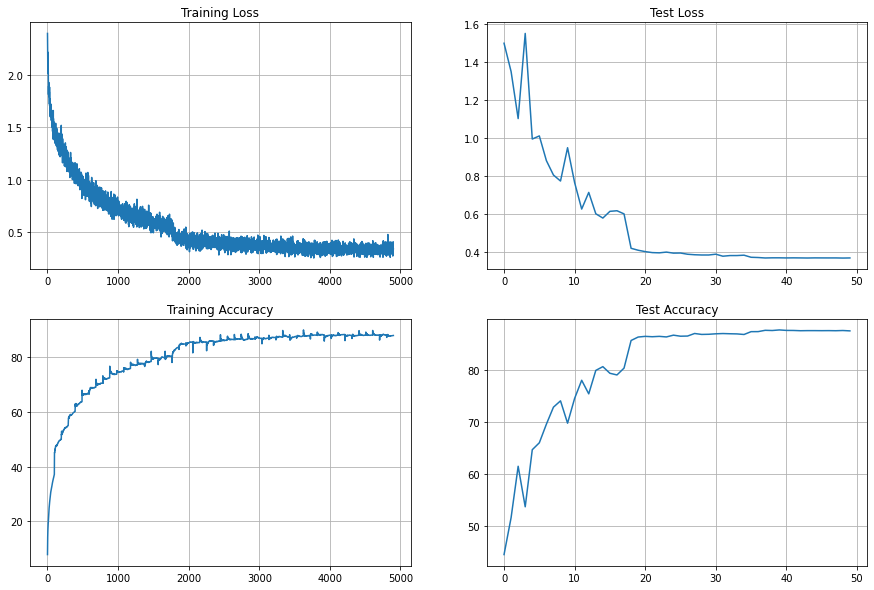

In [16]:
modelTrainTestHistory (train_losses, train_acc, test_losses, test_acc)

In [0]:
import torch
torch.save(model, './gdrive/My Drive/EVA_Library/for_testing_gradCam.pth')

In [0]:
#import torch
#torch.load('./gdrive/My Drive/EVA_Library/for_testing_gradCam.pth')

# Displaying the mis-classified images

In [18]:
ground_truth, classified_lie, my_misclassified_images = misClassfied(model=model, 
                                                                device=device, 
                                                                test_loader=test_loader, 
                                                                req_num_images=25)

ground_truth = ground_truth.numpy().squeeze().astype(int)
classified_lie = classified_lie.numpy().squeeze().astype(int)

# Not showing the mis-classified image here as it will be shown in GradCam
# Bug:<To-do>: displayMisClassfiedImages function de-normalizes the image; if the 'my_misclassified_images' sent as is to
# to the gradCam then images will fade
# displayMisClassfiedImages (ground_truth, Args.dataset_mean, Args.dataset_std, classified_lie, my_misclassified_images)

./gdrive/My Drive/EVA_Library/pyTorchChitra/cnnModels/CNNModel.py:183: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [19]:
layers = ['layer1', 'layer2', 'layer3', 'layer4']

grad_cam = GradCAMView(
    model, layers,
    device, Args.dataset_mean, Args.dataset_std,
)

gradcam_views = grad_cam(my_misclassified_images)

Mode set to GradCAM.


./gdrive/My Drive/EVA_Library/pyTorchChitra/cnnModels/CNNModel.py:183: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


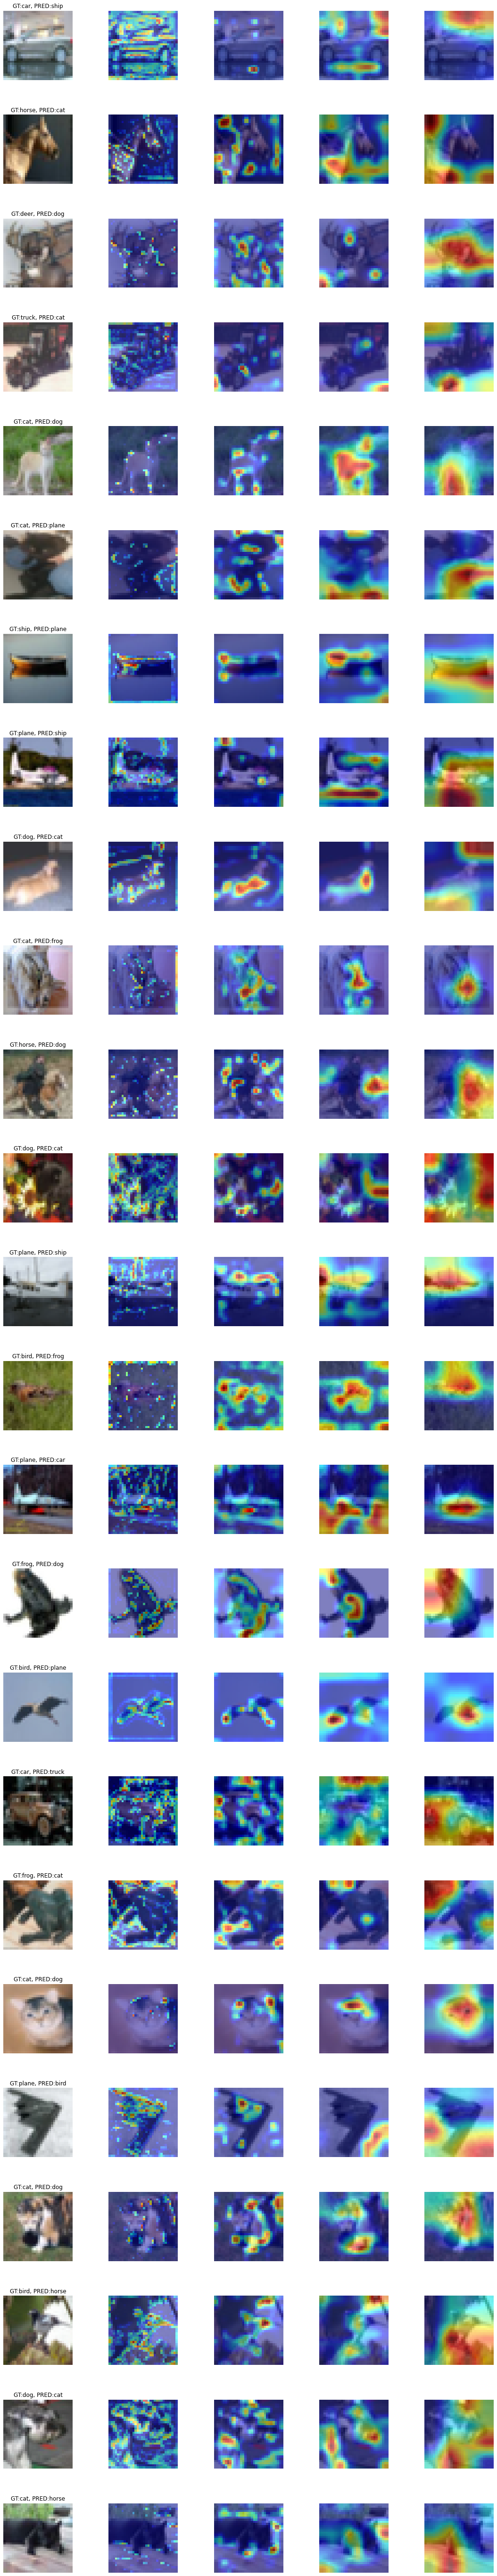

<Figure size 432x288 with 0 Axes>

In [20]:
plot_gradcam(gradcam_views, layers, ground_truth, classified_lie, 'grad_cam')